## Explore dataset

In [1]:
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("drive/MyDrive/tomato.zip", "r")
zip_ref.extractall()
zip_ref.close()

The **PlantVillage dataset** is a publicly available collection of images used for research in agricultural image analysis, particularly in the field of plant disease detection and classification. It **includes images of plant leaves affected by various diseases**pests, and disorders across a range of plant species such as **tomatoes, potatoes, apples, grapes, and wheat.** The dataset provides annotations for each image, detailing information about the plant species, disease type (if applicable), severity of infection, and other relevant details. Researchers and practitioners utilize the PlantVillage dataset to develop automated systems for plant disease diagnosis and management, aiming to improve crop health, increase agricultural productivity, and reduce losses caused by plant diseases.

Our dataset consists of images of tomato plant leaves categorized into different classes representing various diseases and a healthy category.

In [4]:
import os
import shutil
import random

# Define the paths to the train and test folders
train_folder = "tomato/train"
test_folder = "tomato/test"

# Create the test folder if it doesn't exist
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Define the percentage of images to move from each class to the test folder
percent_to_move = 0.20

# Iterate over each class folder in the train folder
for class_folder in os.listdir(train_folder):
    class_train_path = os.path.join(train_folder, class_folder)
    class_test_path = os.path.join(test_folder, class_folder)

    # Create a corresponding class folder in the test folder
    if not os.path.exists(class_test_path):
        os.makedirs(class_test_path)

    # List all images in the class folder
    images = os.listdir(class_train_path)

    # Calculate the number of images to move to the test folder
    num_images_to_move = int(len(images) * percent_to_move)

    # Randomly select images to move to the test folder
    images_to_move = random.sample(images, num_images_to_move)

    # Move the selected images to the test folder
    for image in images_to_move:
        src = os.path.join(class_train_path, image)
        dst = os.path.join(class_test_path, image)
        shutil.move(src, dst)

**dataset structure**

In [5]:
# see folder structure
import os
for dirpath, dirnames, filenames in os.walk("tomato/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 1 images in 'tomato/'.
There are 10 directories and 0 images in 'tomato/test'.
There are 0 directories and 200 images in 'tomato/test/Tomato___healthy'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Spider_mites Two-spotted_spider_mite'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Septoria_leaf_spot'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Bacterial_spot'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Early_blight'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Late_blight'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Target_Spot'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Leaf_Mold'.
There are 0 directories and 200 images in 'tomato/test/Tomato___Tomato_mosaic_virus'.
There are 10 directories and 0 images in 'tomato/val'.
Th

**dataset has 10 categories**
1. **Tomato___Bacterial_spot:** Images in this category depict tomato leaves affected by bacterial spot disease. Bacterial spot is a common bacterial disease caused by various species of bacteria, including Xanthomonas species. Symptoms include small, dark lesions with a water-soaked appearance on the leaves.<br/>

2. **Tomato___Early_blight:** This category includes images of tomato leaves affected by early blight disease. Early blight is caused by the fungus Alternaria solani and is characterized by dark concentric lesions with a target-like appearance on the leaves, typically starting from the lower leaves.<br/>

3. **Tomato___healthy:** Images in this category represent healthy tomato leaves without any signs of disease or pest infestation. These images serve as the reference for what a healthy tomato leaf looks like.<br/>

4. **Tomato___Late_blight:** This category contains images of tomato leaves affected by late blight disease. Late blight, caused by the oomycete pathogen Phytophthora infestans, results in large, irregularly shaped lesions with a water-soaked appearance on the leaves, often leading to rapid defoliation.<br/>

5. **Tomato___Leaf_Mold:** Images in this category depict tomato leaves affected by leaf mold disease. Leaf mold, caused by the fungus Fulvia fulva (formerly Cladosporium fulvum), leads to the development of fuzzy, yellow or brown patches on the leaves, often accompanied by a powdery growth on the underside.<br/>

6. **Tomato___Septoria_leaf_spot:** This category includes images of tomato leaves affected by septoria leaf spot disease. Septoria leaf spot, caused by the fungus Septoria lycopersici, results in small, circular lesions with dark margins and tan or gray centers on the leaves.<br/>

7. **Tomato___Spider_mites Two-spotted_spider_mite:** Images in this category depict tomato leaves infested with two-spotted spider mites (Tetranychus urticae). Spider mite infestations lead to stippling, discoloration, and webbing on the leaves of tomato plants.<br/>

8. **Tomato___Target_Spot:** This category contains images of tomato leaves affected by target spot disease. Target spot, caused by the fungus Corynespora cassiicola, results in circular lesions with dark margins and light centers on the leaves.<br/>

9. **Tomato___Tomato_mosaic_virus:** Images in this category represent tomato leaves infected with tomato mosaic virus (ToMV). Tomato mosaic virus causes mottling, puckering, and distortion of leaves, as well as reduced yield in tomato plants.<br/>

10. **Tomato___Tomato_Yellow_Leaf_Curl_Virus:** This category includes images of tomato leaves infected with tomato yellow leaf curl virus (TYLCV). TYLCV causes yellowing, curling, and upward cupping of leaves, as well as stunted growth and reduced fruit yield.<br/>

In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory where the dataset is located
dataset_dir = 'tomato/train/'

# List of categories
categories = [
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___healthy",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]

# Function to plot random images
def plot_random_images(num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    axes = axes.flatten()

    for i in range(num_images):
        # Randomly select a category
        category = random.choice(categories)

        # Randomly select an image from the category
        img_file = random.choice(os.listdir(os.path.join(dataset_dir, category)))
        img_path = os.path.join(dataset_dir, category, img_file)

        # Load and plot the image
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(category)
#         axes[i].set_xlabel(img.shape) # set_xlabel for image shape
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

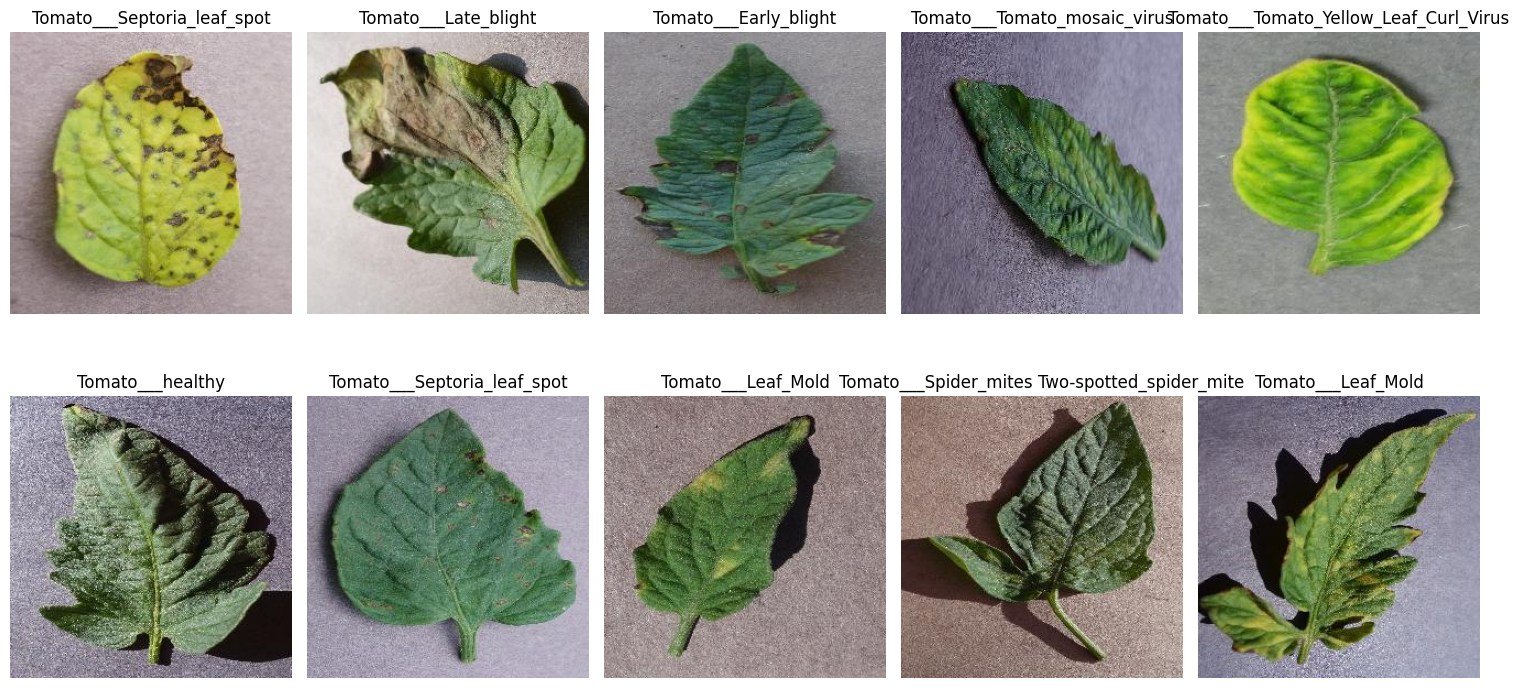

In [7]:
# plot randomly 10 images
# Plot 10 random images
plot_random_images(num_images=10)

In [8]:
# Randomly select a category
category = random.choice(categories)

# Randomly select an image from the category
img_file = random.choice(os.listdir(os.path.join(dataset_dir, category)))
img_path = os.path.join(dataset_dir, category, img_file)

# Load and plot the image
img = mpimg.imread(img_path)

# shape of all images
print(f"shape of all images : {img.shape}")
# img = mpimg.imread(img_path)
# plt.imshow(img)
# plt.show()

shape of all images : (256, 256, 3)


## modeling

In [9]:
# create a baseline model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "tomato/train/"
val_dir = "tomato/val/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(256, 256), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=32,
                                               target_size=(256, 256),
                                               class_mode="categorical",
                                               seed=42)

model_1 = Sequential()
model_1.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.3))

model_1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.5))

model_1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.5))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(10, activation='softmax'))

model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model_1
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/10
250/250 [==============================] - 282s 1s/step - loss: 0.9669 - accuracy: 0.6794 - val_loss: 52.7594 - val_accuracy: 0.1000
Epoch 2/10
250/250 [==============================] - 246s 984ms/step - loss: 0.6268 - accuracy: 0.7861 - val_loss: 2.5167 - val_accuracy: 0.4120
Epoch 3/10
250/250 [==============================] - 245s 981ms/step - loss: 0.4953 - accuracy: 0.8336 - val_loss: 0.3956 - val_accuracy: 0.8630
Epoch 4/10
250/250 [==============================] - 245s 981ms/step - loss: 0.3592 - accuracy: 0.8825 - val_loss: 0.4315 - val_accuracy: 0.8650
Epoch 5/10
250/250 [==============================] - 246s 986ms/step - loss: 0.2839 - accuracy: 0.9060 - val_loss: 1.3944 - val_accuracy: 0.6220
Epoch 6/10
250/250 [==============================] - 245s 978ms/step - loss: 0.2599 - accuracy: 0.9134 - val_loss: 1.4838 - val_accuracy: 0.6700
Epoch 7/10
250/250 [====================

In [24]:
import numpy as np
import itertools
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

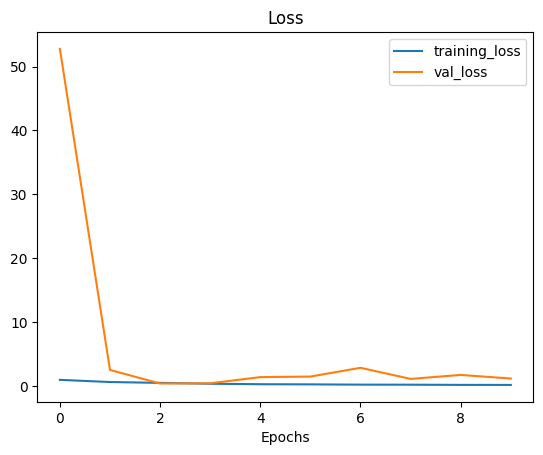

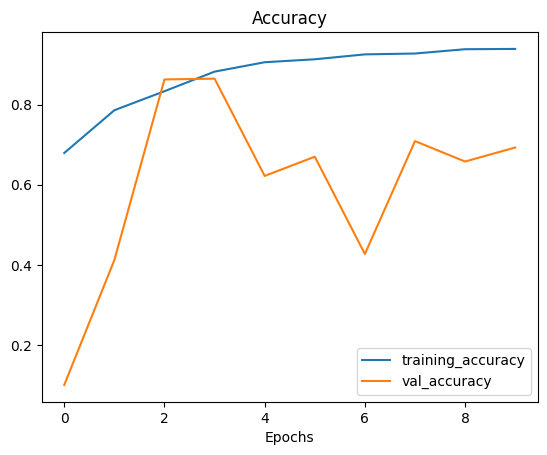

In [ ]:
plot_loss_curves(history_1)

In [ ]:
test_dir = "tomato/test/"
test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(256, 256),
                                               class_mode="categorical",
                                               seed=42)
model_1.evaluate(test_data)

Found 2000 images belonging to 10 classes.
63/63 [==============================] - 14s 214ms/step - loss: 0.9903 - accuracy: 0.7195


[0.9902793169021606, 0.7195000052452087]

In [ ]:
model_1.save('model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Preprocessing**

apply clahe equalization on images

In [10]:
import os
import cv2

def apply_clahe_to_folder(input_folder, output_folder):
    # Iterate over each subfolder (class) in the input folder
    for root, dirs, files in os.walk(input_folder):
        for directory in dirs:
            input_class_folder = os.path.join(input_folder, directory)
            output_class_folder = os.path.join(output_folder, directory)

            # Create the corresponding class folder in the output folder if it doesn't exist
            if not os.path.exists(output_class_folder):
                os.makedirs(output_class_folder)

            # Iterate over each image file in the class folder
            for filename in os.listdir(input_class_folder):
                if filename.endswith(".JPG") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
                    input_image_path = os.path.join(input_class_folder, filename)
                    output_image_path = os.path.join(output_class_folder, filename)

                    # Read the image
                    image = cv2.imread(input_image_path)

                    # Apply CLAHE to each channel separately
                    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                    clahe_image = cv2.merge([clahe.apply(channel) for channel in cv2.split(image)])

                    # Save the equalized image
                    cv2.imwrite(output_image_path, clahe_image)

In [11]:
# apply clahe and create new folder preprocessed images
train_input_folder = "tomato/train"
train_output_folder = "preprocess_tomato/train"
apply_clahe_to_folder(train_input_folder, train_output_folder)

test_input_folder = "tomato/test"
test_output_folder = "preprocess_tomato/test"
apply_clahe_to_folder(test_input_folder, test_output_folder)

val_input_folder = "tomato/val"
val_output_folder = "preprocess_tomato/val"
apply_clahe_to_folder(val_input_folder, val_output_folder)


In [12]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory where the dataset is located
dataset_dir = 'preprocess_tomato/train/'

# List of categories
categories = [
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___healthy",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]

# Function to plot random images
def plot_random_images(num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    axes = axes.flatten()

    for i in range(num_images):
        # Randomly select a category
        category = random.choice(categories)

        # Randomly select an image from the category
        img_file = random.choice(os.listdir(os.path.join(dataset_dir, category)))
        img_path = os.path.join(dataset_dir, category, img_file)

        # Load and plot the image
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(category)
#         axes[i].set_xlabel(img.shape) # set_xlabel for image shape
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

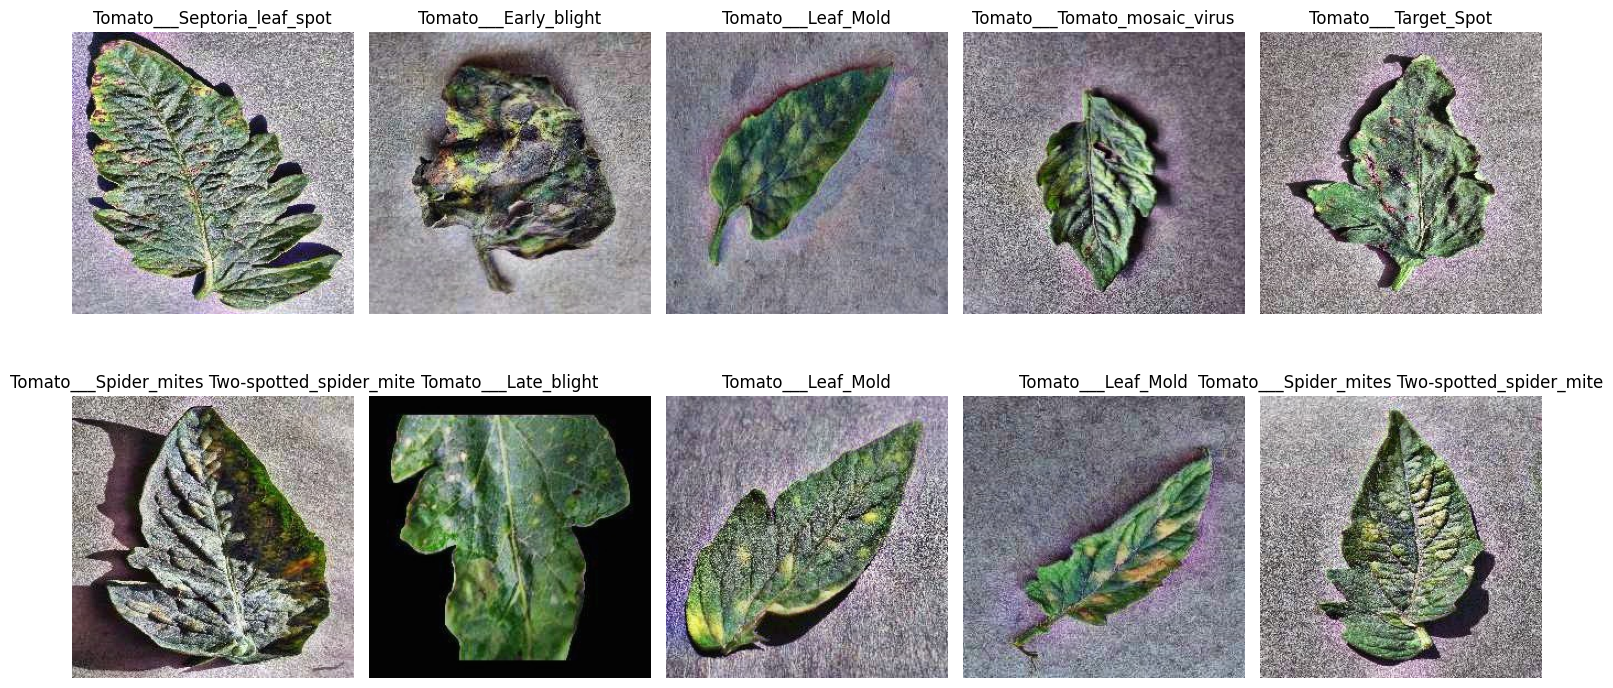

In [13]:
# plot randomly 10 images
plot_random_images(num_images=10)

## Apply Transfer Learning

**Create Model**

In [14]:
import tensorflow as tf
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# OLD
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 5. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 6. Add some dense layers
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)


# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_2 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [15]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                             

In [16]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

# Setup the train and val directories
train_dir = "preprocess_tomato/train/"
val_dir = "preprocess_tomato/val/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)


Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [17]:
history_2 = model_2.fit(train_data,
                                 epochs=50,
                                 steps_per_epoch=len(train_data),
                                 validation_data=valid_data,
                                 validation_steps=int(0.25 * len(valid_data)))

Epoch 1/50
250/250 [==============================] - 37s 97ms/step - loss: 0.7101 - accuracy: 0.7678 - val_loss: 0.3414 - val_accuracy: 0.8750
Epoch 2/50
250/250 [==============================] - 27s 108ms/step - loss: 0.3021 - accuracy: 0.8984 - val_loss: 0.3667 - val_accuracy: 0.8672
Epoch 3/50
250/250 [==============================] - 20s 81ms/step - loss: 0.2053 - accuracy: 0.9286 - val_loss: 0.3489 - val_accuracy: 0.9062
Epoch 4/50
250/250 [==============================] - 22s 89ms/step - loss: 0.1726 - accuracy: 0.9410 - val_loss: 0.3335 - val_accuracy: 0.8867
Epoch 5/50
250/250 [==============================] - 20s 82ms/step - loss: 0.1519 - accuracy: 0.9463 - val_loss: 0.2741 - val_accuracy: 0.9297
Epoch 6/50
250/250 [==============================] - 20s 81ms/step - loss: 0.1218 - accuracy: 0.9565 - val_loss: 0.3660 - val_accuracy: 0.8906
Epoch 7/50
250/250 [==============================] - 25s 97ms/step - loss: 0.1156 - accuracy: 0.9611 - val_loss: 0.2931 - val_accuracy

In [18]:
test_dir = "preprocess_tomato/test/"
test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)
model_2.evaluate(test_data)

Found 2000 images belonging to 10 classes.
63/63 [==============================] - 6s 89ms/step - loss: 0.2079 - accuracy: 0.9535


[0.20794634521007538, 0.953499972820282]

In [19]:
model_2.save('model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
import pandas as pd
history_dict = history_2.history
history_df = pd.DataFrame(history_dict)
history_df.to_csv('history_2.csv',index=False)

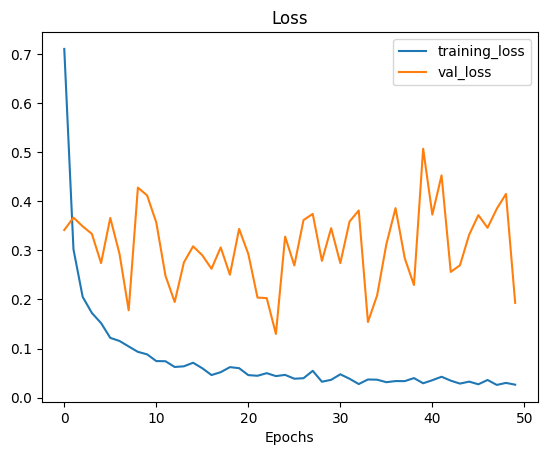

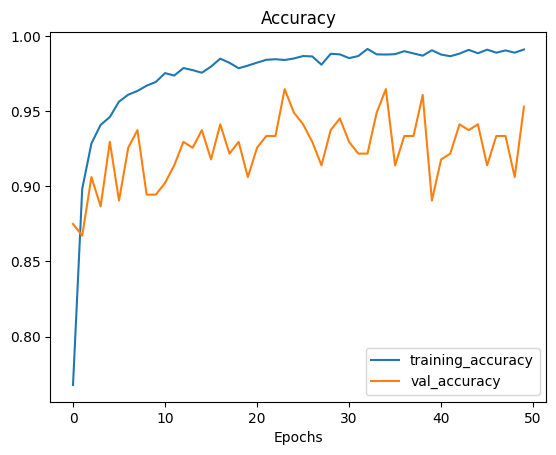

In [25]:
plot_loss_curves(history_2)

In [26]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [27]:
test_dir = "preprocess_tomato/test/"
test_datagen = ImageDataGenerator()
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(256, 256),
                                               class_mode="categorical",
                                               shuffle=False)
class_names = list(test_data.class_indices.keys())
class_names

Found 2000 images belonging to 10 classes.


['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [28]:
pred_probs = model_2.predict(test_data, verbose=1)
pred_classes = pred_probs.argmax(axis=1)
pred_classes

63/63 [==============================] - 10s 103ms/step


array([0, 0, 0, ..., 9, 9, 9])

In [29]:
labels = test_data.classes
labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

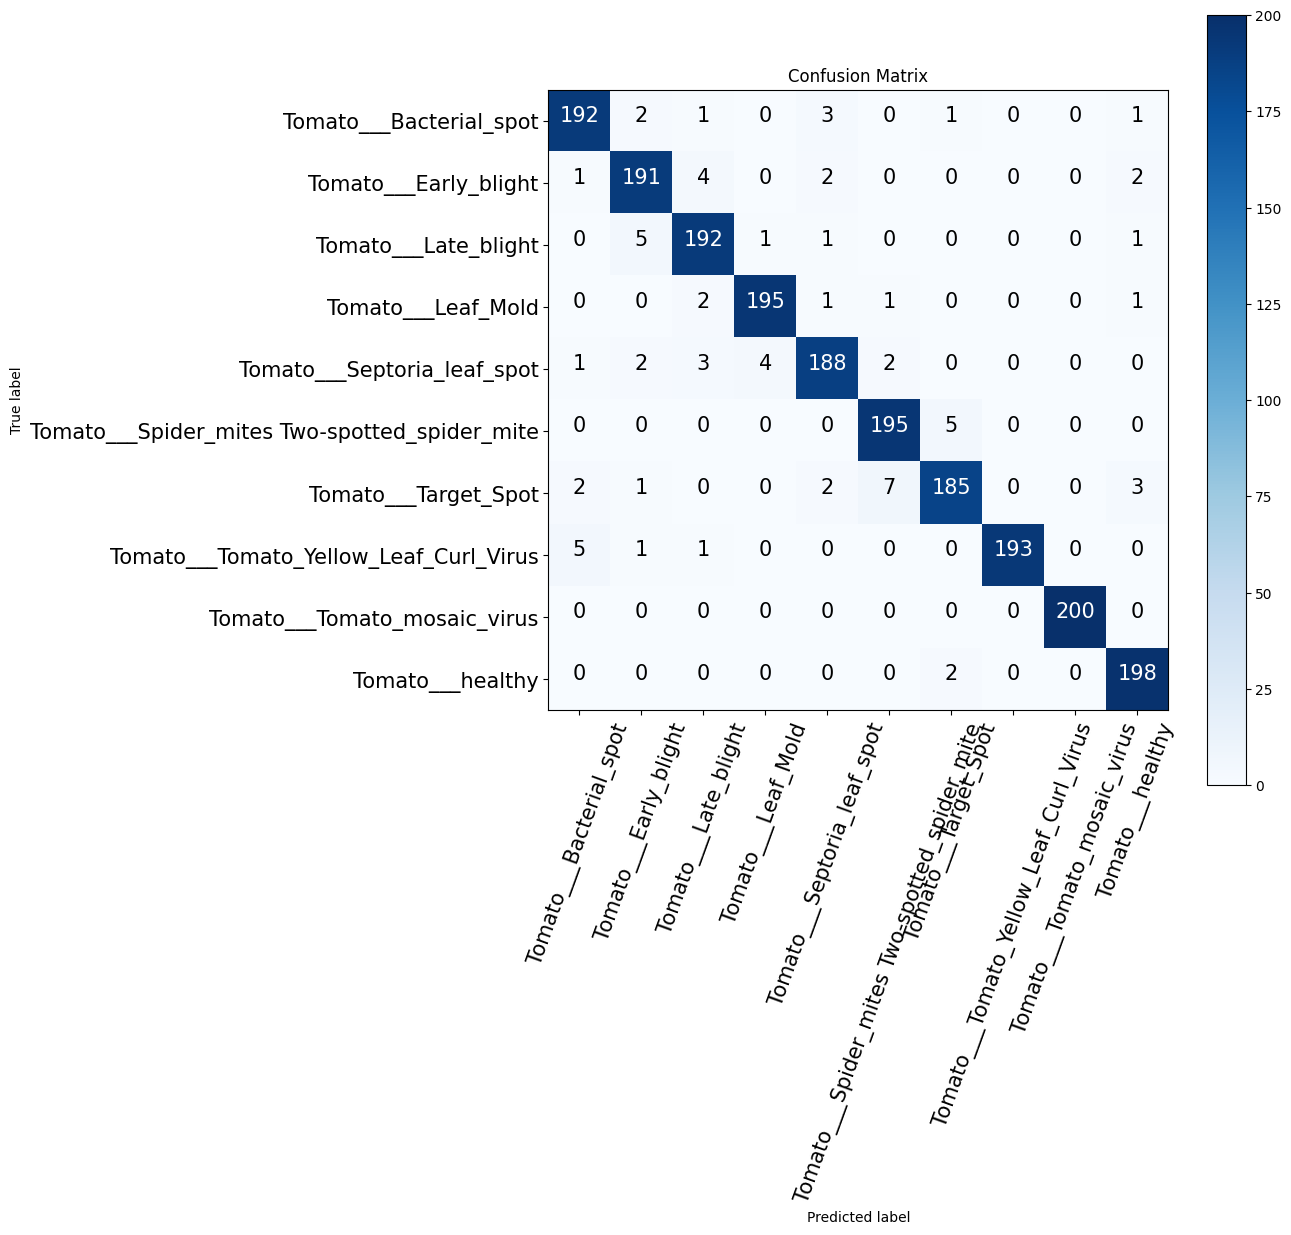

In [30]:
make_confusion_matrix(y_true=labels,
                      y_pred=pred_classes,
                      classes=class_names)

In [31]:
# create a dict which contains category wise precision, recall and f1_score
from sklearn.metrics import classification_report
classification_dict = classification_report(labels, pred_classes,output_dict=True)
classification_dict

{'0': {'precision': 0.9552238805970149,
  'recall': 0.96,
  'f1-score': 0.9576059850374063,
  'support': 200},
 '1': {'precision': 0.9455445544554455,
  'recall': 0.955,
  'f1-score': 0.9502487562189055,
  'support': 200},
 '2': {'precision': 0.9458128078817734,
  'recall': 0.96,
  'f1-score': 0.9528535980148883,
  'support': 200},
 '3': {'precision': 0.975, 'recall': 0.975, 'f1-score': 0.975, 'support': 200},
 '4': {'precision': 0.9543147208121827,
  'recall': 0.94,
  'f1-score': 0.947103274559194,
  'support': 200},
 '5': {'precision': 0.9512195121951219,
  'recall': 0.975,
  'f1-score': 0.9629629629629629,
  'support': 200},
 '6': {'precision': 0.9585492227979274,
  'recall': 0.925,
  'f1-score': 0.9414758269720102,
  'support': 200},
 '7': {'precision': 1.0,
  'recall': 0.965,
  'f1-score': 0.9821882951653944,
  'support': 200},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 200},
 '9': {'precision': 0.9611650485436893,
  'recall': 0.99,
  'f1-score': 0.9753694

In [32]:
classification_dict_with_category_name = {}
for x in classification_dict.keys():
    if x=='accuracy':
        break
    else:
        classification_dict_with_category_name[class_names[int(x)]] = classification_dict[x]
matrix_df = pd.DataFrame(classification_dict_with_category_name).T.sort_values(['f1-score'],ascending=False)
matrix_df

precision  recall  f1-score  \
Tomato___Tomato_mosaic_virus                    1.000000   1.000  1.000000   
Tomato___Tomato_Yellow_Leaf_Curl_Virus          1.000000   0.965  0.982188   
Tomato___healthy                                0.961165   0.990  0.975369   
Tomato___Leaf_Mold                              0.975000   0.975  0.975000   
Tomato___Spider_mites Two-spotted_spider_mite   0.951220   0.975  0.962963   
Tomato___Bacterial_spot                         0.955224   0.960  0.957606   
Tomato___Late_blight                            0.945813   0.960  0.952854   
Tomato___Early_blight                           0.945545   0.955  0.950249   
Tomato___Septoria_leaf_spot                     0.954315   0.940  0.947103   
Tomato___Target_Spot                            0.958549   0.925  0.941476   

                                               support  
Tomato___Tomato_mosaic_virus                     200.0  
Tomato___Tomato_Yellow_Leaf_Curl_Virus           200.0  
Tomato___healthy                                 200.0  
Tomato___Leaf_Mold                               200.0  
Tomato___Spider_mites Two-spotted_spider_mite    200.0  
Tomato___Bacterial_spot                          200.0  
Tomato___Late_blight                             200.0  
Tomato___Early_blight                            200.0  
Tomato___Septoria_leaf_spot                      200.0  
Tomato___Target_Spot                             200.0